In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Figure size 1500x600 with 0 Axes>

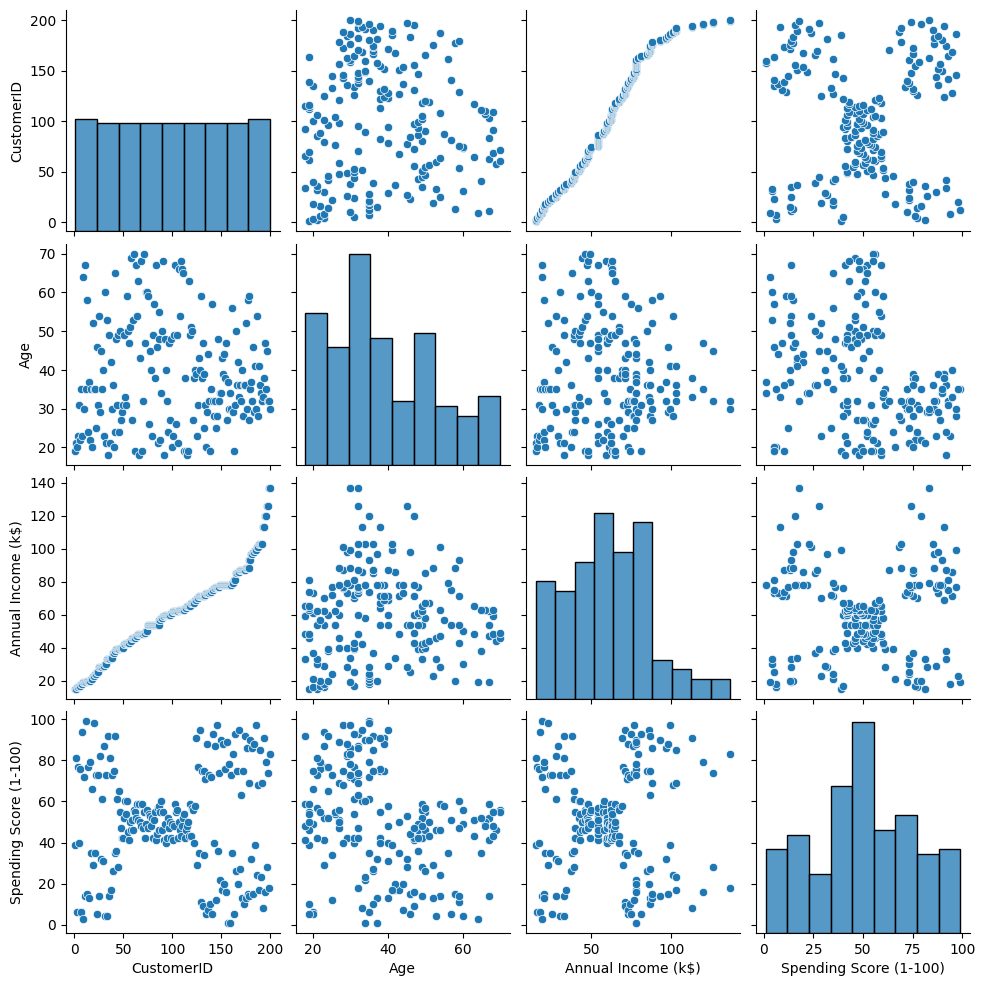

In [8]:
plt.figure(figsize=(15,6))
sns.pairplot(df)
plt.show()

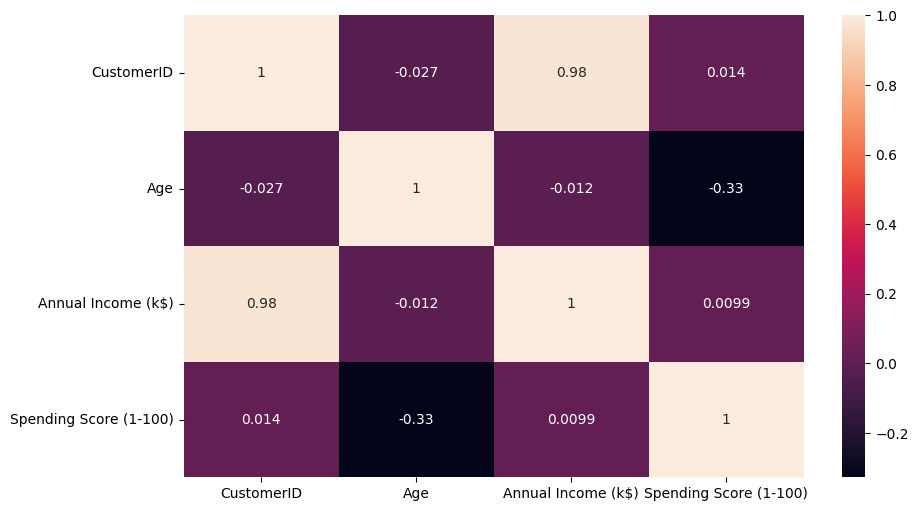

In [12]:
import matplotlib.pyplot as plt
numerical_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numerical_features.corr(), annot=True)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit_transform(numerical_features)

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(scaler)
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])

In [16]:
print(pca.explained_variance_ratio_)

[0.49477783 0.33144344]


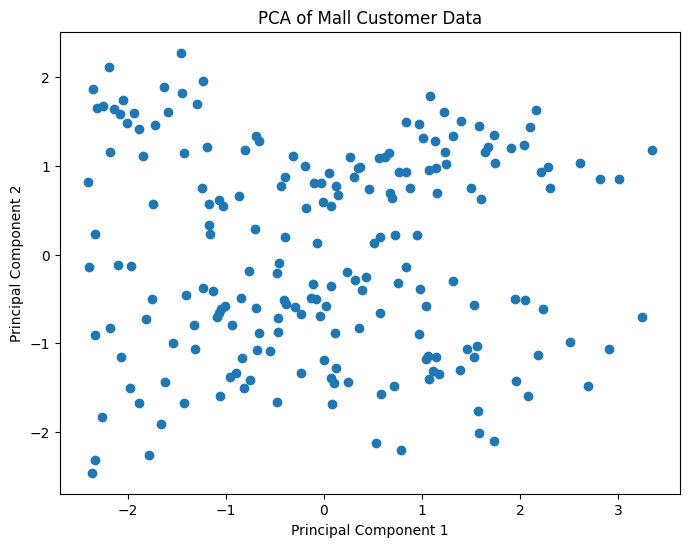

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mall Customer Data')
plt.show()

In [18]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(principalDf)
cluster_labels = kmeans.labels_
principalDf['cluster'] = cluster_labels

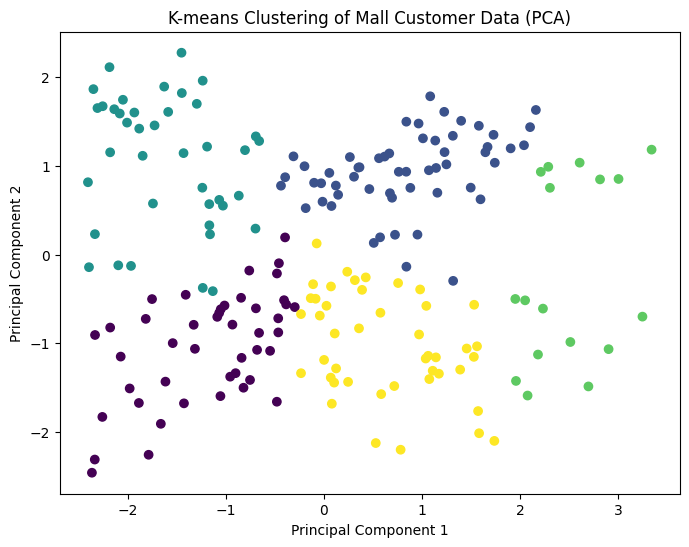

   principal component 1  principal component 2  cluster
0              -2.403924               0.816423        2
1              -2.348416               1.866763        2
2              -2.393558              -0.142008        2
3              -2.307126               1.653214        2
4              -2.332853               0.230933        2


In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Mall Customer Data (PCA)')
plt.show()
print(principalDf.head())

In [47]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principalDf)
    inertia.append(kmeans.inertia_)

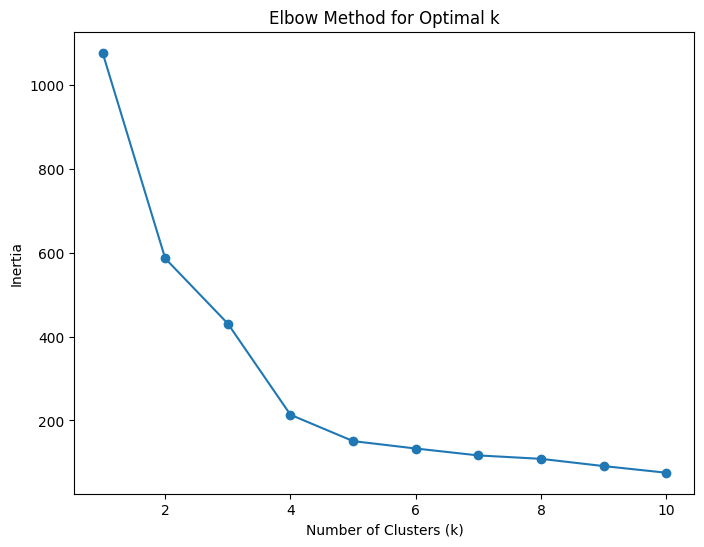

In [48]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
silhouette_avg = silhouette_score(principalDf[['principal component 1', 'principal component 2']], cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.38227844267279565
